# Mathematics for Machine Learning

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## PyTorch Introduction

In [3]:
# Creating tensors in PyTorch

tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([[1, 2, 3], [4, 5, 6]])

print("Tensor a:", tensor_a)
print("Tensor a shape:", tensor_a.shape)
print('\n')
print("Tensor b:", tensor_b)
print("Tensor b shape:", tensor_b.shape)

Tensor a: tensor([1, 2, 3])
Tensor a shape: torch.Size([3])


Tensor b: tensor([[1, 2, 3],
        [4, 5, 6]])
Tensor b shape: torch.Size([2, 3])


In [4]:
# Basic operations

sum_tensors = tensor_a + tensor_b[0]
product_tensors = tensor_a * 2

print("Sum of tensors:", sum_tensors)
print("Tensor multiplied by 2:", product_tensors)

Sum of tensors: tensor([2, 4, 6])
Tensor multiplied by 2: tensor([2, 4, 6])


In [5]:
# Reshaping tensors

reshaped_tensor = tensor_b.view(3, 2)   # Equivalent to tensor_b.reshape(3,2)
print("Reshaped tensor b:", reshaped_tensor)
print("Reshaped tensor b shape:", reshaped_tensor.shape)

Reshaped tensor b: tensor([[1, 2],
        [3, 4],
        [5, 6]])
Reshaped tensor b shape: torch.Size([3, 2])


In [6]:
# Concatenating tensors

print("Tensor a shape:", tensor_a.shape)
print("Tensor b shape:", tensor_b.shape)

print(50*'-')

try:
  torch.cat([tensor_a, tensor_b])
except Exception as e:
  print(e)

print(50*'-')

print(tensor_a.unsqueeze(0).shape)
tensor_cat = torch.cat([tensor_a.unsqueeze(0), tensor_b], dim=0)
print("Tensor cat shape:", tensor_cat.shape)
print("Tensor cat:", tensor_cat)

Tensor a shape: torch.Size([3])
Tensor b shape: torch.Size([2, 3])
--------------------------------------------------
Tensors must have same number of dimensions: got 1 and 2
--------------------------------------------------
torch.Size([1, 3])
Tensor cat shape: torch.Size([3, 3])
Tensor cat: tensor([[1, 2, 3],
        [1, 2, 3],
        [4, 5, 6]])


### Automatic differentiation

In [7]:
# Autograd: Automatic Differentiation
x = torch.tensor(2.0, requires_grad=True)
def y_func(x):
  return x**2 + 3*x + 1 + torch.sin(x**2)

y = y_func(x)

print('Gradient before backward call:', x.grad)
print(50*'-')

# Compute gradients
y.backward()

# Gradient of y with respect to x
print("dy/dx at x = 2:", x.grad)


Gradient before backward call: None
--------------------------------------------------
dy/dx at x = 2: tensor(4.3854)


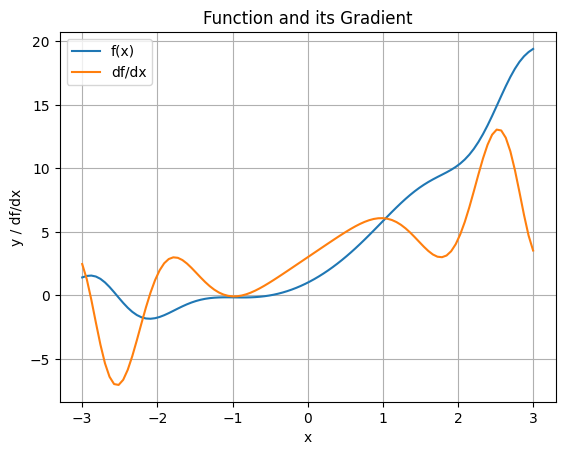

In [8]:
# Generating a range of values
x = torch.linspace(-3, 3, steps=100, requires_grad=True)

# Applying the function
y = y_func(x)

# Prepare to store gradients
grads = torch.zeros_like(x)

# Calculate gradients for each element in x
for i in range(x.size(0)):

    # Calculate the function and backpropagate on each element
    y[i].backward(retain_graph=True)

    # Store the computed gradient
    grads[i] = x.grad[i]

# Plotting
plt.plot(x.detach().numpy(), y.detach().numpy(), label='f(x)')
plt.plot(x.detach().numpy(), grads.numpy(), label='df/dx')
plt.xlabel('x')
plt.ylabel('y / df/dx')
plt.legend()
plt.grid()
plt.title('Function and its Gradient')
plt.show()

In [9]:
x = torch.tensor([0.2,0.8,0.9,0.3,0.2])                     # input tensor
y = torch.tensor([0,1,1,0,0]).to(dtype=torch.float32)       # expected output

# Weights and biases b + w^T x
w = torch.randn(5, 5, requires_grad=True)
b = torch.randn(5, requires_grad=True)

learning_rate = 0.1

for _ in range(100):

  z = torch.matmul(x, w)+b
  loss = torch.norm(y-z)
  loss.backward()

  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

    # Zero gradients after updating
    w.grad.zero_()
    b.grad.zero_()

torch.matmul(x, w) +b

tensor([-0.0464,  0.9725,  0.9001, -0.0063,  0.0718], grad_fn=<AddBackward0>)

## Object Oriented Programming

In [10]:
class TensorOperations:

  def __init__(self, data):

      self.data = data
      print('Class initialised')

  def add_scalar(self, scalar):
      return self.data + scalar

  def update_data(self, new_data):
      self.data = new_data

  def mean(self):
      return torch.mean(self.data, dim=1)


In [11]:
tensor1 = torch.linspace(0,10, 11).repeat(5,) # concatenates
print(tensor1, tensor1.shape)
tensor1 = torch.linspace(0,10, 11).repeat(5,1) # duplicate on 5 rows
print(tensor1.shape)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,  0.,  1.,  2.,
         3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.,  9., 10.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,
         9., 10.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]) torch.Size([55])
torch.Size([5, 11])


In [12]:
tensor1 = torch.linspace(0,10, 11).repeat(5,1)

print(tensor1)
print(50*'-')

# Initalising class
class1 = TensorOperations(tensor1)

# Accessing an attribute
print(class1.data)



tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])
--------------------------------------------------
Class initialised
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])


In [13]:
# Testing a method
value = class1.add_scalar(3)
print(value)
print(50*'-')
print(class1.data)

tensor([[ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
        [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
        [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
        [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
        [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]])
--------------------------------------------------
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])


In [14]:
# Testing another method
class1.update_data(torch.randn(5,11)) # replace self.data by random values
class1.data

tensor([[-0.6844,  0.9617, -1.0064, -1.2101, -1.0058,  0.7086, -0.0034, -0.1221,
          0.7413, -0.7540, -0.0859],
        [-0.3309,  0.0893, -0.1571, -0.7842,  0.5375, -0.3385, -0.5103,  0.9928,
          0.2757, -1.1584,  0.0991],
        [-1.9520, -0.8933,  0.6296,  1.2738,  0.1749,  1.7743,  0.6370,  0.3345,
          1.6141, -0.9714, -1.3274],
        [-2.8199, -1.9505, -1.3165,  0.0069,  2.5750,  1.4902, -0.7340,  0.8720,
          0.5764,  1.5498,  1.8399],
        [-1.2370, -1.5118, -0.1753, -0.3718, -1.2401,  0.5584, -1.3832,  1.3947,
         -0.4839,  1.4365,  1.2770]])

In [15]:
class1.data = torch.randn(5,11)+10.  # Another way to modify data
class1.data

tensor([[11.6921,  9.2131, 10.8916, 10.2451, 11.5464,  8.2003,  8.9793, 10.8701,
          9.8749, 10.2011,  9.5287],
        [10.2044,  8.5106, 10.8213, 11.3857, 11.1286, 10.5866,  9.5123, 10.0234,
          9.2572,  9.5177,  9.6815],
        [10.1654, 10.0831, 11.8552, 10.5527, 11.7635,  8.9060,  8.7787, 11.4380,
          8.8824,  8.5737, 10.0517],
        [ 9.7840, 10.6966,  9.5055,  9.2729,  9.5350,  9.6812, 11.7837, 10.5978,
          9.5954,  9.8071,  9.5483],
        [ 8.8723, 12.2410, 12.4251, 10.7826,  9.4064,  9.3609, 10.5917, 11.1377,
         11.6951, 10.2804, 10.8650]])

In [16]:
# Inheritance

class AdvancedTensorOperations(TensorOperations):
    def __init__(self, data):
        super().__init__(data)

    def sum_of_elements(self):
        return torch.sum(self.data, dim=1)

    def product_of_elements(self):
        return torch.prod(self.data, dim=0)


In [17]:
class2 = AdvancedTensorOperations(tensor1)
print(class2.sum_of_elements())
print(class2.product_of_elements())
print(50*'-')
print(class2.mean()) # This method is defined in the parent class

Class initialised
tensor([55., 55., 55., 55., 55.])
tensor([0.0000e+00, 1.0000e+00, 3.2000e+01, 2.4300e+02, 1.0240e+03, 3.1250e+03,
        7.7760e+03, 1.6807e+04, 3.2768e+04, 5.9049e+04, 1.0000e+05])
--------------------------------------------------
tensor([5., 5., 5., 5., 5.])


In [18]:
class CumulativeTensorOperations(TensorOperations):
    def __init__(self, data, alpha=3):
        super().__init__(data)
        self.alpha = alpha

    def cumsum_of_elements(self):
        return torch.cumsum(self.data, dim=1) * self.alpha


class3 = CumulativeTensorOperations(tensor1, alpha=2)
print(class3.cumsum_of_elements())
print(50*'-')

try:
  class3.product_of_elements() # It doesn't inherit the methods from AdvancedTensorOperations
except Exception as e:
  print(e)

Class initialised
tensor([[  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.],
        [  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.],
        [  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.],
        [  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.],
        [  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.]])
--------------------------------------------------
'CumulativeTensorOperations' object has no attribute 'product_of_elements'


## GPU runtime - Google Colab

In [19]:
if torch.cuda.is_available():
  print("GPU available")

else:
  print("GPU not available")

GPU available


In [20]:
ones_vec = torch.ones(2, 2)
print(ones_vec.device)

cpu


In [21]:
# Setting default device as cuda. It won't run if cuda is not available. Change runtime first.
torch.set_default_device('cuda')

ones_vec = torch.ones(2, 2)
print(ones_vec.device)


cuda:0


In [22]:
# For more flexibility in the code

device_cpu = 'cpu'
device_cuda = 'cuda'
device_mac = 'mps'

vec1 = torch.randn(2,3, device=device_cuda)
print('Device 1:', vec1.device)
print(25*'-')

vec1 = vec1.to(device=device_cpu)
print('Device 2:', vec1.device)
print('Dtype 2:', vec1.dtype)
print(25*'-')

vec1 = vec1.to(device=device_cuda, dtype=torch.float32)
print('Device 2:', vec1.device)
print('Dtype 2:', vec1.dtype)


Device 1: cuda:0
-------------------------
Device 2: cpu
Dtype 2: torch.float32
-------------------------
Device 2: cuda:0
Dtype 2: torch.float32


### Brownian motion

 $W_t$ brownian motion if $W_t\sim \mathcal{N}(0, \sqrt{t})$

 For teaching purpose we are going to construct the brownian motion this way:

 $dW \sim \mathcal{N}(0, \sqrt{dt})$ and $W_t = \int_0^t dW_s$ with $W_0=0$

 Generate dW of shape(100, 10), concatenate with a column of 0, then simply W = cumsum(dW) on each row.

 We end up with (100, 11)-shaped W, corresponding 100 paths, each at 11 time stamps

In [23]:
# Constructing a geomeric brownian motion
torch.set_default_device('cpu')

dt = 0.1

#
try:
  sqrt_dt = torch.sqrt(dt)
except Exception as e:
  print(e)

sqrt(): argument 'input' (position 1) must be Tensor, not float


In [24]:
dt = torch.tensor([0.1])
random_gen = torch.randn(100, 10, device=device_cuda) # Generating N(0, 1)

# dW and random_gen have shape (100, 10), or (batch_size, time_steps)
try:
  dW = torch.sqrt(dt) * random_gen
except Exception as e:
  print(e)

Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!


In [25]:
rand = torch.randn(5, 3, device=device_cuda)
print(rand)
print(rand.cumsum(dim=1)) # cumsum on each row (along columns)
# if dim = 0, cumsum on each column (along rows)

tensor([[ 1.4333,  0.5494,  0.4625],
        [-1.2788, -0.3409, -0.7506],
        [-0.4313, -0.0932, -0.8068],
        [ 1.7433, -0.2133,  0.8132],
        [-0.2041, -2.4901,  0.8231]], device='cuda:0')
tensor([[ 1.4333,  1.9827,  2.4452],
        [-1.2788, -1.6198, -2.3703],
        [-0.4313, -0.5245, -1.3313],
        [ 1.7433,  1.5300,  2.3432],
        [-0.2041, -2.6942, -1.8710]], device='cuda:0')


In [26]:
try:
    dW = random_gen * torch.sqrt(dt).to(device=device_cuda)
    W = dW.cumsum(dim=1)
    print(W[:3,:])
    print(W.shape)
    # add a column of 0s at the beginning (len = number of rows)
    W = torch.cat([torch.zeros(W.shape[0], 1, device=W.device), W], dim=1)
    print(W[:3,:])
    print(W.shape)
except Exception as e:
    print(e)


tensor([[ 0.3854,  1.1570,  0.9817,  0.9044,  1.1361,  0.7650,  1.0339,  0.7316,
          0.6091,  0.3184],
        [-0.3460, -0.3570, -0.9946, -1.1282, -1.0629, -0.9986, -1.2471, -1.2063,
         -0.9065, -0.9296],
        [ 0.3403, -0.0836, -0.1430, -0.4796, -0.3394, -0.5374, -0.4097, -0.4179,
         -0.4032, -0.8405]], device='cuda:0')
torch.Size([100, 10])
tensor([[ 0.0000,  0.3854,  1.1570,  0.9817,  0.9044,  1.1361,  0.7650,  1.0339,
          0.7316,  0.6091,  0.3184],
        [ 0.0000, -0.3460, -0.3570, -0.9946, -1.1282, -1.0629, -0.9986, -1.2471,
         -1.2063, -0.9065, -0.9296],
        [ 0.0000,  0.3403, -0.0836, -0.1430, -0.4796, -0.3394, -0.5374, -0.4097,
         -0.4179, -0.4032, -0.8405]], device='cuda:0')
torch.Size([100, 11])


In [27]:
W

tensor([[ 0.0000,  0.3854,  1.1570,  ...,  0.7316,  0.6091,  0.3184],
        [ 0.0000, -0.3460, -0.3570,  ..., -1.2063, -0.9065, -0.9296],
        [ 0.0000,  0.3403, -0.0836,  ..., -0.4179, -0.4032, -0.8405],
        ...,
        [ 0.0000, -0.7469, -0.5368,  ..., -0.0445, -0.1942, -0.8680],
        [ 0.0000, -0.1906, -0.2056,  ..., -0.0406,  0.8157,  0.7622],
        [ 0.0000, -0.2249,  0.0432,  ..., -0.6076, -0.5651, -0.1960]],
       device='cuda:0')

To plot the matrix W.T, of shape (11, 100) directly, 
Each row of the matrix is treated as a separate series.
The x-axis is implicitly set to the column indices (0 to 10).
The y-axis values are the values in the matrix.


can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
----------------------------------------------------------------------------------------------------


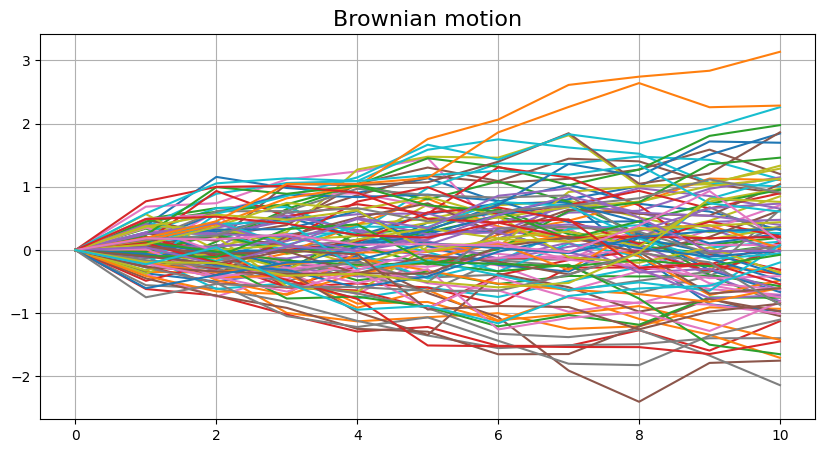

In [28]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
try:
  plt.plot(W.T)
except Exception as e:
  print(e)
  print(100*'-')

ax.plot(W.cpu().numpy().T)
ax.set_title('Brownian motion', fontsize=16)
ax.grid()
plt.show()

## Geometric Brownian Motion - putting things together (if time permits)

$$dX_t=\mu X_tdt+\sigma X_tdW_t$$

where $\mu$, $\sigma\in\mathbb{R}$ and $W_t-W_s\sim\mathcal{N}(0, t-s)$.

Although it has a closed formula, we will use a Euler discretisation for the simulation.

$$X_{t+1}=X_t+\mu X_t dt+\sigma X_tdW_t$$

In [ ]:
class GBM:

  """
  Class representing a Geometric Brownian Motion (GBM) model.

  Attributes:
  -----------
  device : torch.device
      The device (CPU or GPU) used for tensor computations.
  mu : float
      The drift coefficient of the GBM.
  sigma : float
      The volatility (standard deviation) coefficient of the GBM.
  x0 : float
      The initial value of the process.
  dt : torch.tensor
      The time step for the simulation.
  paths : torch.tensor
      The simulated paths of the GBM.
  """

  def __init__(self, mu, sigma, x0=1., dt=0.01, device='cpu'):
      self.device = torch.device(device)

      self.mu = mu
      self.sigma = sigma
      self.x0 = x0
      self.dt = torch.tensor([dt], device=self.device)

      self.paths = None


  def simulate(self, n_paths=50, n_steps=20, return_paths=False):
      paths = torch.zeros(n_paths, n_steps+1, device=self.device)
      paths[:,0] = self.x0

      # Incremental Brownian motion
      dW = torch.randn(n_paths, n_steps, device=self.device) * torch.sqrt(self.dt)

      for i in range(1, n_steps+1):
          paths[:,i] = paths[:,i-1] + self.mu * paths[:,i-1] * self.dt + \
                        self.sigma * paths[:,i-1] * dW[:,i-1]

      self.paths = paths
      print('Simulation done')


  def to(self, device):
      """
      Changes the device of the model and its data.

      Parameters:
      ----------
      device : str
          The target device, either 'cpu' or 'cuda'.
      """
      self.device = torch.device(device)
      self.dt = self.dt.to(device=device)

      if self.paths is not None:
          self.paths = self.paths.to(device=device)


  def plot(self):
      """
      Plots the simulated GBM paths.
      """
      if self.paths is None:
          raise RuntimeError("Paths have to be simulated first")

      plt.figure(figsize=(10,6), constrained_layout=True)
      plt.plot(self.paths.cpu().numpy().T)
      plt.grid()
      plt.title('Geometric Brownian motion with mu={}, sigma={}'.format(self.mu, self.sigma))
      plt.show()

In [30]:
gbm1 = GBM(0.05,0.15, device='cpu')

In [31]:
gbm1.simulate(n_paths=100)

Simulation done


In [32]:
gbm1.to(device='cuda')

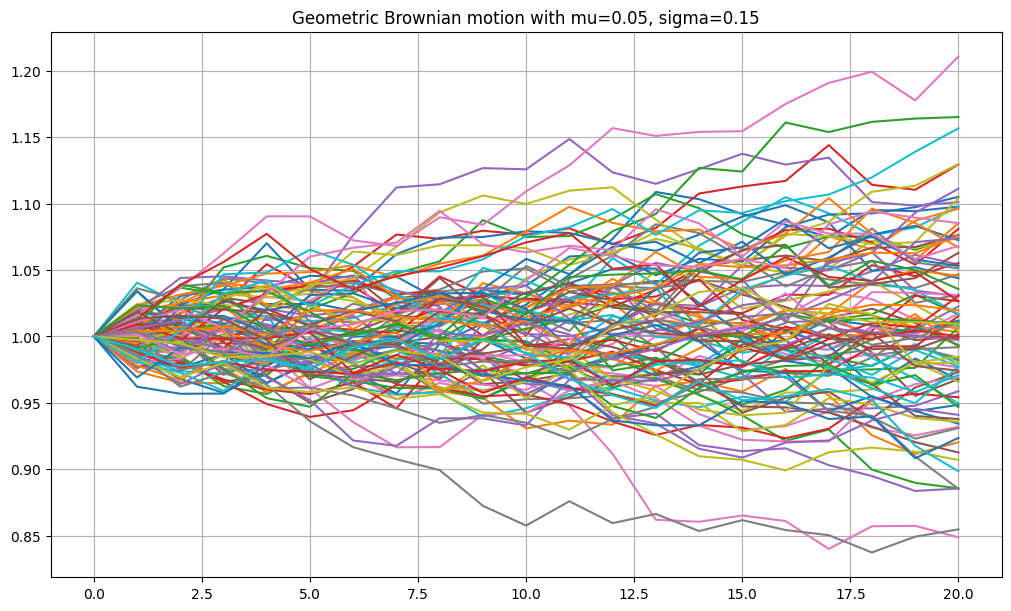

In [33]:
gbm1.plot()

In [55]:
# For those who are interested....

class GBM_4finance(GBM):

  def __init__(self, mu, sigma, x0=1.0, strike = 1.0, dt=0.01, device='cuda'):

    super().__init__(mu, sigma, dt=dt, device=device)

    self.x0 = torch.tensor([x0], requires_grad=True)
    self.strike = torch.tensor([strike], device=self.device)

  def price(self):
        """
        returns payoff of call
        """
        # self.paths is N * T, where T is the number of time steps
        # for each path, take final price and subtract the strike price. take mean among all paths
        return torch.max(self.paths[:, -1] - self.strike, torch.zeros_like(self.paths[:, -1], device=self.device)).mean()

  def compute_delta(self):
      """
      Delta is a measure of an option's sensitivity to a change in the price of the underlying asset.
      It is computed as the gradient of the option's price with respect to the initial asset price.
      """
      price_ = self.price()
      price_.backward()

      # Return the gradient (delta) as a scalar
      return self.x0.grad.item()


In [56]:
mu, sig = 0.04, 0.15
x0, strike = 1.0, 1.0
gbm2 = GBM_4finance(mu, sig, x0, strike, device='cuda')
gbm2.simulate(n_paths=100, n_steps=20)
print('price:', gbm2.price().detach().cpu().numpy())
print('delta:', gbm2.compute_delta())

Simulation done
price: 0.026721606
delta: 0.46672165393829346


In [57]:
def black_scholes(S, K, T, r, sigma, option_type='call', return_delta=False):
    # Ensure all inputs are tensors
    S, K, T, r, sigma = map(torch.tensor, (S, K, T, r, sigma))

    # Calculate d1 and d2
    d1 = (torch.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * torch.sqrt(T))
    d2 = d1 - sigma * torch.sqrt(T)

    # CDF of the standard normal distribution
    N = torch.distributions.Normal(0, 1).cdf

    # Calculate price based on option type
    if option_type == 'call':
        price = S * N(d1) - K * torch.exp(-r * T) * N(d2)
        delta = N(d1)  # Delta for a call option
    elif option_type == 'put':
        price = K * torch.exp(-r * T) * N(-d2) - S * N(-d1)
        delta = N(d1) - 1  # Delta for a put option
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    # Return price and delta if requested
    if return_delta:
        return price, delta
    
    return price


mu, sig = 0.04, 0.15
x0, strike = 1.0, 1.0
T = 0.2
black_scholes(x0, strike, T, mu, sig, option_type='call', return_delta=True)



(tensor(0.0308), tensor(0.5607))